In [1]:
import jax.numpy as jnp
import numpy as np

from tueplots import bundles, axes, cycler, figsizes
from tueplots.constants.color import palettes
import matplotlib.pyplot as plt

bundle = bundles.neurips2023()
plt.rcParams.update(bundle)
axes.lines()
plt.rcParams.update(cycler.cycler(color=palettes.paultol_muted))

In [2]:
times = np.arange(1, 16)

errors_t = np.load("ou_errors_times_1_to_15.npy")    
errors_d = np.load("ou_errors_dims_1_to_32.npy")

db_errors_t = np.load("/Users/libbybaker/Documents/Python/DiffusionBridge/ornstein_uhlenbeck/diffusion_bridge_errors_forward_times_1_to_15.npy")

db_errors_d = np.load("/Users/libbybaker/Documents/Python/DiffusionBridge/ornstein_uhlenbeck/diffusion_bridge_errors_forward_dims_1_to_32.npy")

db_errors_bw_t = np.load("/Users/libbybaker/Documents/Python/DiffusionBridge/ornstein_uhlenbeck/diffusion_bridge_errors_backward_times_1_to_15.npy")

db_errors_bw_d = np.load("/Users/libbybaker/Documents/Python/DiffusionBridge/ornstein_uhlenbeck/diffusion_bridge_errors_backward_dims_1_to_32.npy")


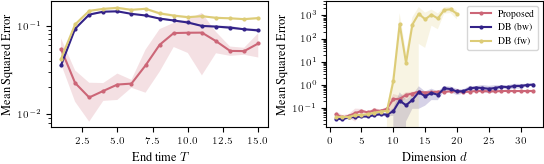

In [7]:
plt.rcParams.update(figsizes.neurips2023(nrows=1, ncols=2))
fig, ax = plt.subplot_mosaic([["t", "d"]])

c = 1
markersize = 2

mean_t = jnp.mean(errors_t, axis=0)
sd_t = c*jnp.std(errors_t, axis=0)

db_mean_t = jnp.mean(db_errors_t, axis=0)
db_sd_t = c*jnp.std(db_errors_t, axis=0)

db_bw_mean_t = jnp.mean(db_errors_bw_t, axis=0)
db_bw_sd_t = c*jnp.std(db_errors_bw_t, axis=0)

mean_d = jnp.mean(errors_d, axis=0)
sd_d = c*jnp.std(errors_d, axis=0)

db_mean_d = jnp.mean(db_errors_d, axis=0)
db_sd_d = c*jnp.std(db_errors_d, axis=0)

db_mean_bw_d = jnp.mean(db_errors_bw_d, axis=0)[:20]
db_sd_bw_d = c*jnp.std(db_errors_bw_d, axis=0)[:20]

ax["t"].semilogy(times, mean_t, "o-", label="Proposed", markersize=markersize)
ax["t"].fill_between(times, mean_t - sd_t, mean_t + sd_t, alpha=0.2)

ax["t"].semilogy(times, db_mean_t, "o-", label="Diffusion Bridge", markersize=markersize)
ax["t"].fill_between(times, db_mean_t - db_sd_t, db_mean_t + db_sd_t, alpha=0.2)

ax["t"].semilogy(times, db_bw_mean_t, "o-", label="Diffusion Bridge Backward", markersize=markersize)
ax["t"].fill_between(times, db_bw_mean_t - db_bw_sd_t, db_bw_mean_t + db_bw_sd_t, alpha=0.2)

ax["t"].set_xlabel(r"End time $T$")
ax["t"].set_ylabel("Mean Squared Error")

ax["d"].semilogy(np.arange(1, 33), mean_d, "o-", label="Proposed", markersize=markersize)
ax["d"].fill_between(np.arange(1, 33), mean_d - sd_d, mean_d + sd_d, alpha=0.2)

ax["d"].semilogy(np.arange(1, 33), db_mean_d, "o-", label="DB (bw)", markersize=markersize)
ax["d"].fill_between(np.arange(1, 33), db_mean_d - db_sd_d, db_mean_d + db_sd_d, alpha=0.2)

ax["d"].semilogy(np.arange(1, 21), db_mean_bw_d, "o-", label="DB (fw)", markersize=markersize)
ax["d"].fill_between(np.arange(1, 21), db_mean_bw_d - db_sd_bw_d, db_mean_bw_d + db_sd_bw_d, alpha=0.2)

ax["d"].legend()
ax["d"].set_xlabel(r"Dimension $d$")
ax["d"].set_ylabel("Mean Squared Error")

plt.savefig("ou_errors.pdf")


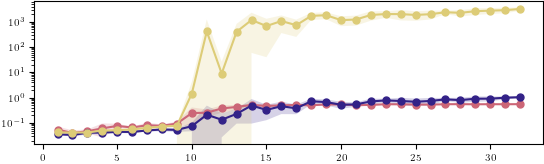

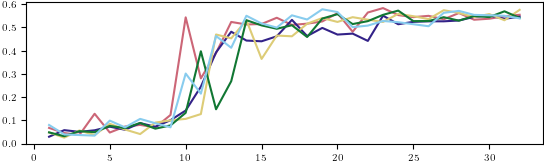

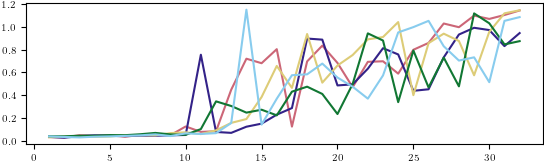

In [4]:
mean_d = jnp.mean(errors_d, axis=0)
sd_d = jnp.std(errors_d, axis=0)

db_mean_d = jnp.mean(db_errors_d, axis=0)
db_sd_d = jnp.std(db_errors_d, axis=0)

db_mean_bw_d = jnp.mean(db_errors_bw_d, axis=0)
db_sd_bw_d = jnp.std(db_errors_bw_d, axis=0)

plt.semilogy(np.arange(1, 33), mean_d, "o-", label="Proposed", markersize=5)
plt.fill_between(np.arange(1, 33), mean_d - sd_d, mean_d + sd_d, alpha=0.2)

plt.semilogy(np.arange(1, 33), db_mean_d, "o-", label="DB (bw)", markersize=5)
plt.fill_between(np.arange(1, 33), db_mean_d - db_sd_d, db_mean_d + db_sd_d, alpha=0.2)

plt.semilogy(np.arange(1, 33), db_mean_bw_d, "o-", label="DB (fw)", markersize=5)
plt.fill_between(np.arange(1, 33), db_mean_bw_d - db_sd_bw_d, db_mean_bw_d + db_sd_bw_d, alpha=0.2)

plt.show()

for i in range(errors_d.shape[0]):
    plt.plot(np.arange(1, 33), errors_d[i, :])
plt.show()

for i in range(db_errors_d.shape[0]):
    plt.plot(np.arange(1, 33), db_errors_d[i, :])
plt.show()